In [1]:
# Imports and iPython magic setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import MARIGOLD as mgd
from MARIGOLD import Condition

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
# Load Data from spreadsheets

cwd = os.path.abspath('')
dat_name = 'example_database.dat'
path_to_dump = os.path.join(cwd, "example_sheets") # Assumes the "example_sheets" directory is present in the cwd

# If the .dat file already exists, we could just load it immediatiately by setting this to False
refetch = True
if not os.path.isfile(os.path.join(cwd, dat_name)) or refetch:
    mgd.extractLocalDataFromDir(path_to_dump, dump_file=dat_name, sheet_type='adix_template4')

database : list[Condition] = mgd.loadData(dat_name)


In [3]:
database.sort(key=lambda cond: cond.jgloc+cond.jf) # Sort the database by jf and jg, in ascending order

# This will print out the area averages
print("jf\tjgloc\t⟨α⟩\t⟨α vg⟩\t⟨(1-α) vf⟩\tε_jg")
for cond in database:
    cond.mirror(method='axisym')
    print(f"{cond.jf:0.2f}\t{cond.jgloc:0.3f}\t{cond.area_avg('alpha'):0.3f}\t{cond.area_avg('alpha_ug1'):0.3f}\t{cond.area_avg('jf'):0.3f}\t\t{ (cond.area_avg('alpha_ug1') - cond.jgloc)/(cond.jgloc) *100 :0.1f}")

jf	jgloc	⟨α⟩	⟨α vg⟩	⟨(1-α) vf⟩	ε_jg
0.75	0.100	0.100	0.105	0.750		5.0
1.00	0.109	0.090	0.114	1.005		3.9
1.03	0.157	0.124	0.169	1.012		7.7


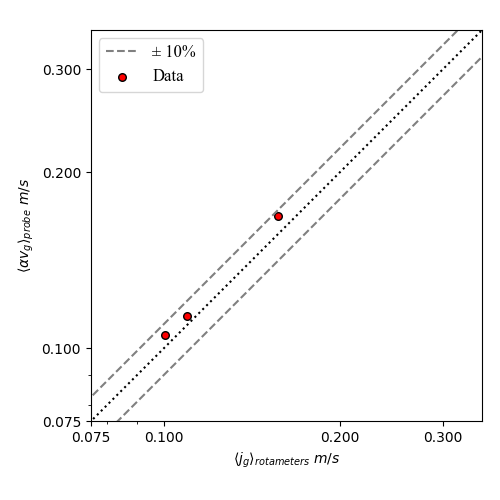

In [4]:
# Gas benchmark
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
for cond in database:

    # mpbl = ax.scatter(cond.jgloc, cond.area_avg('alpha_ug1'), marker=cond.marker_type, color = cond.marker_color)
    mpbl = ax.scatter(cond.jgloc, cond.area_avg('alpha_ug1'), marker='o', color = 'r', edgecolors='black', s=30)

ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-10, 10], [-11, 11], '--', color='grey')
plt.plot([-10, 10], [-9, 9], '--', color='grey', label = "± 10%")
plt.plot([-10, 10], [-10, 10], linestyle='dotted', color='black')

ax.scatter([-10], [-10], linestyle='None', marker='o', color = 'r', edgecolor='black', s=30, label = "Data")

plt.xlim(0.075, 0.35)
plt.ylim(0.075, 0.35)

ax.set_xticks([0.075, 0.1, 0.2, 0.3])
ax.set_yticks([0.075, 0.1, 0.2, 0.3])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_aspect('equal')

plt.xlabel(r'$\langle j_{g} \rangle _{rotameters}\ m/s$')
plt.ylabel(r'$\langle \alpha v_{g} \rangle_{probe}\  m/s$')

# plt.colorbar(mpbl, label=r'$\langle j_{g} \rangle \ m/s$', ticks=np.arange(0, 0.51, 0.1), boundaries = np.arange(0, 0.51, 0.01), values = np.arange(0, 0.5, 0.01))

plt.legend()
plt.tight_layout()
plt.savefig(r".\gas_benchmark.png", dpi=500)
plt.show()

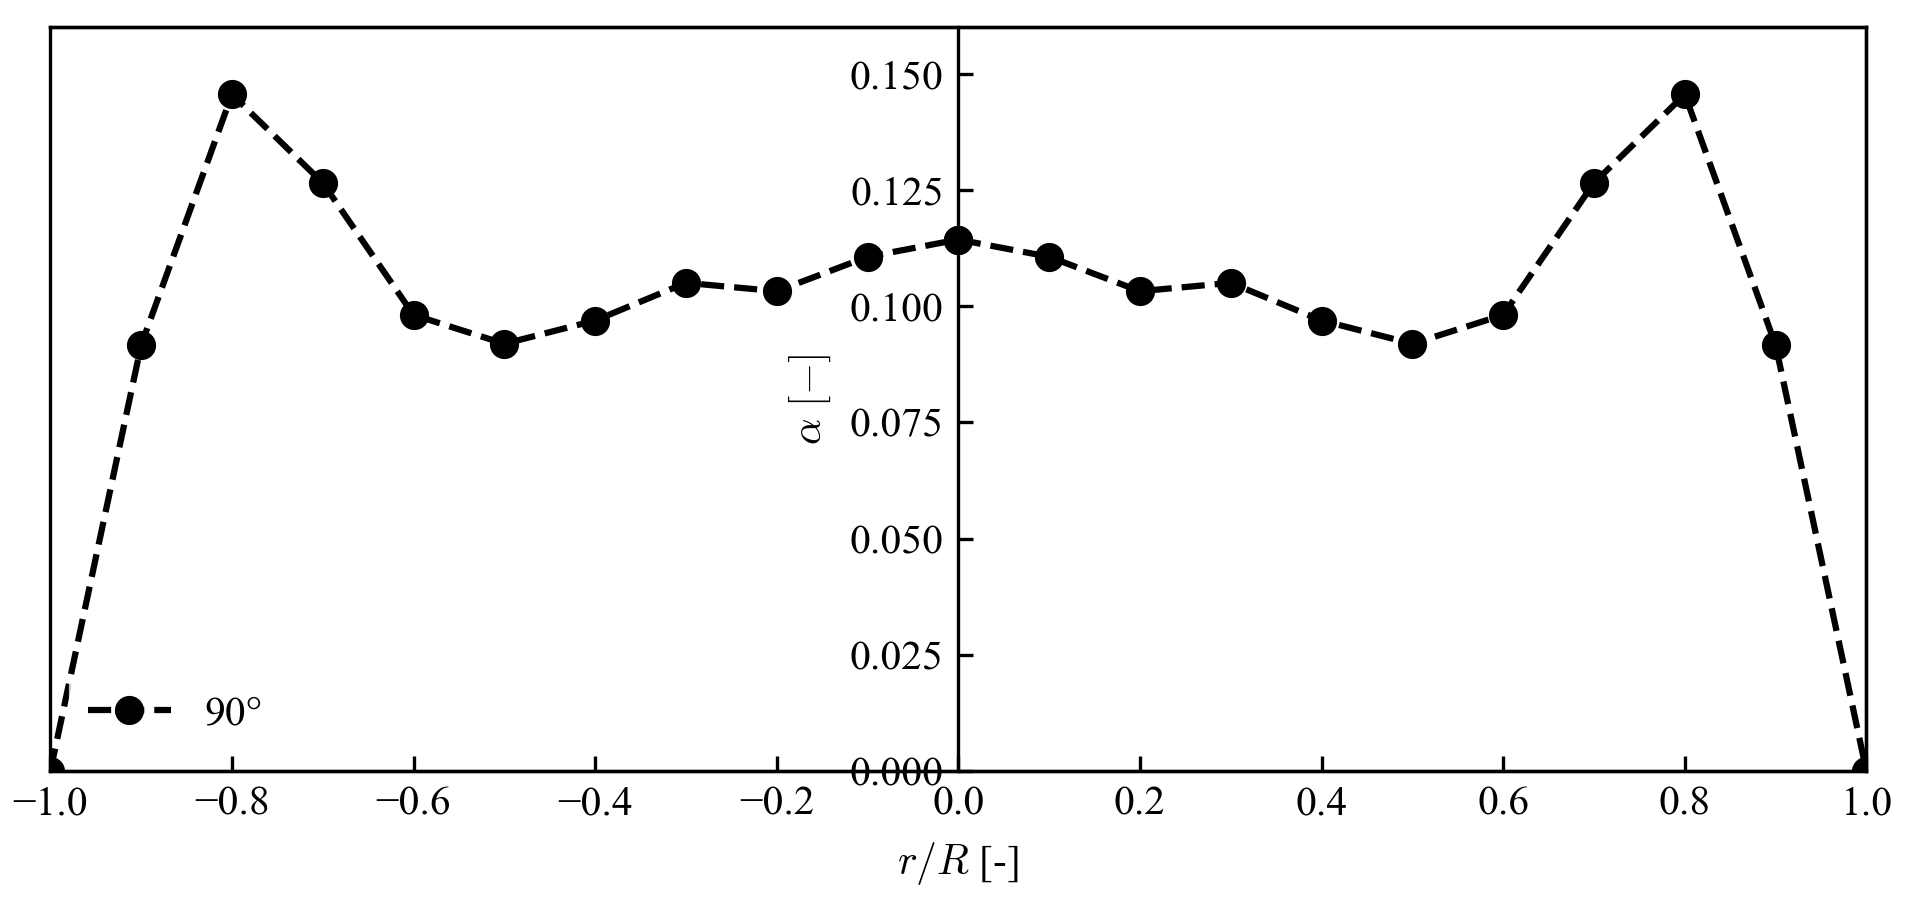

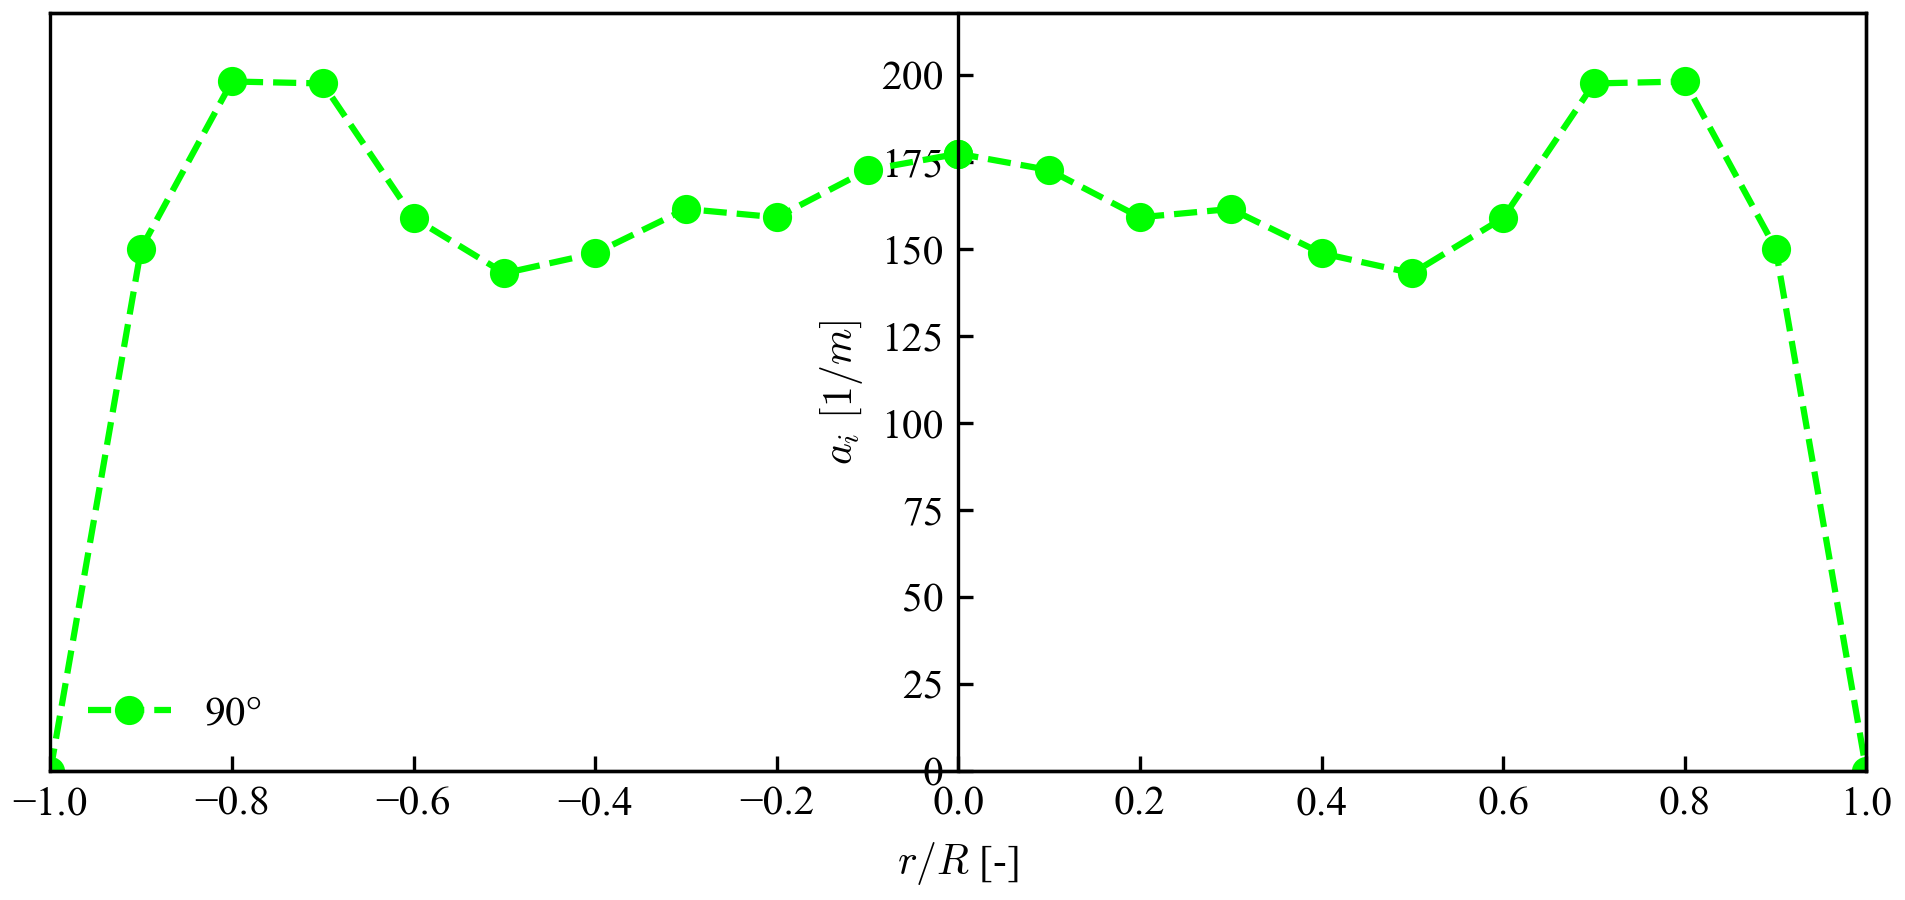

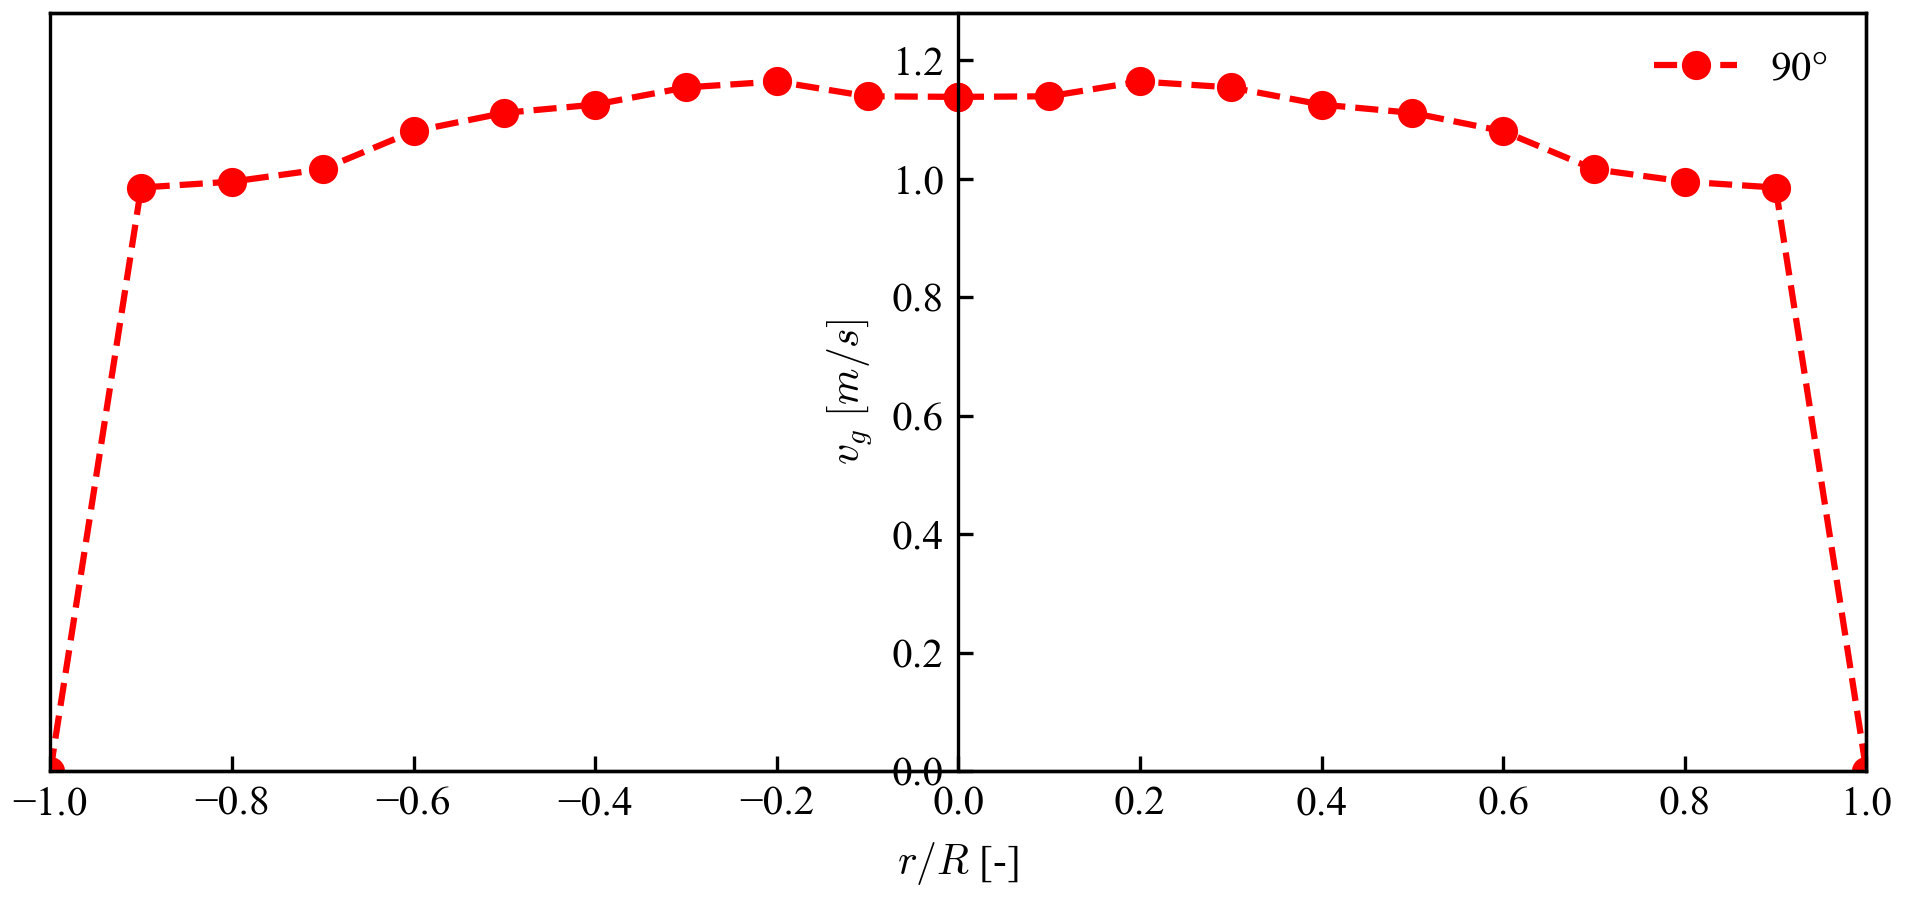

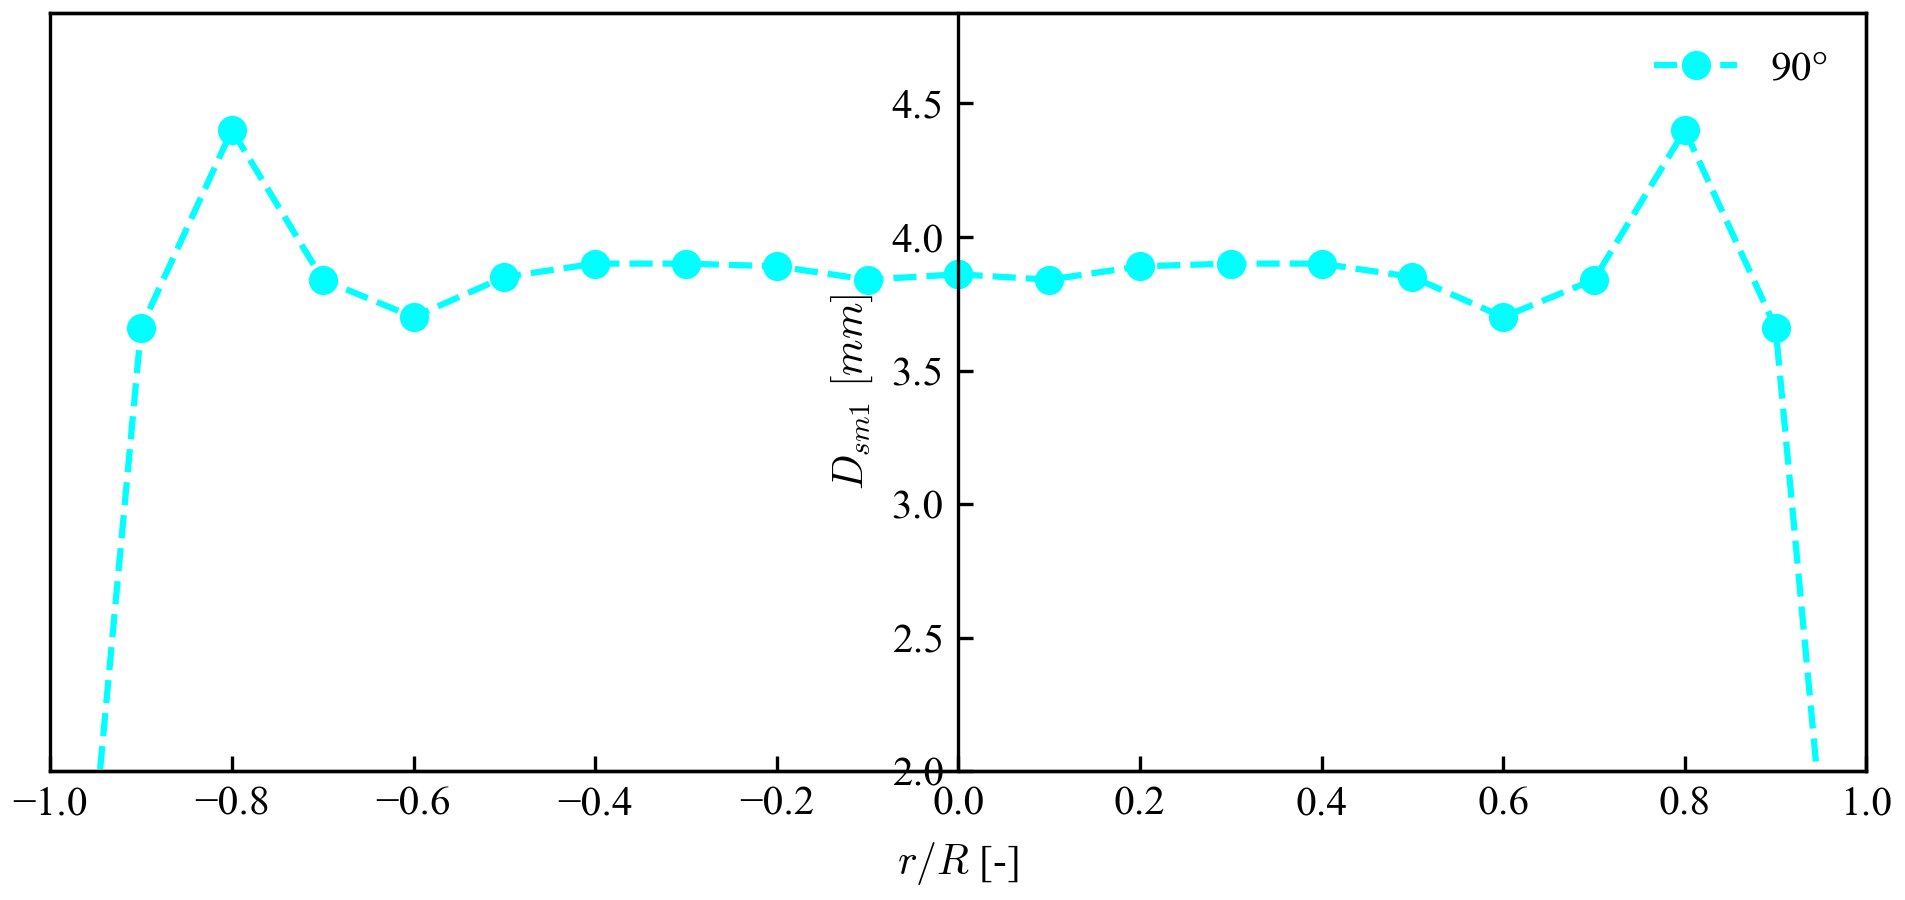

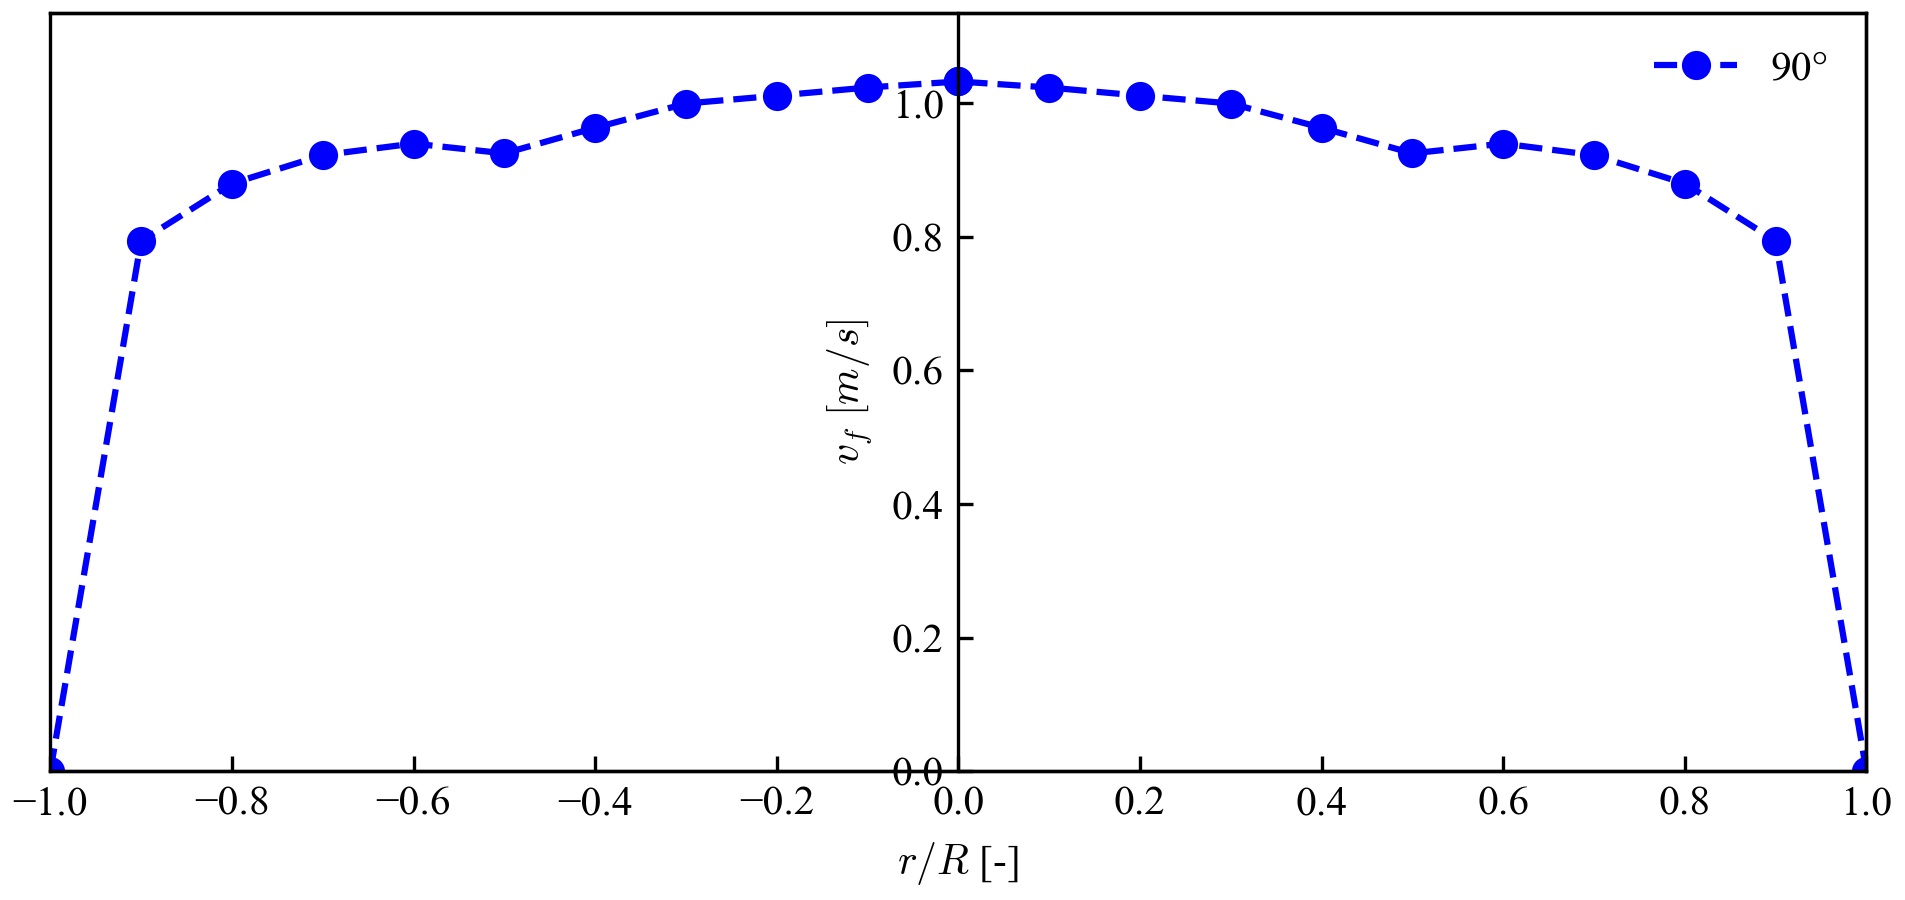

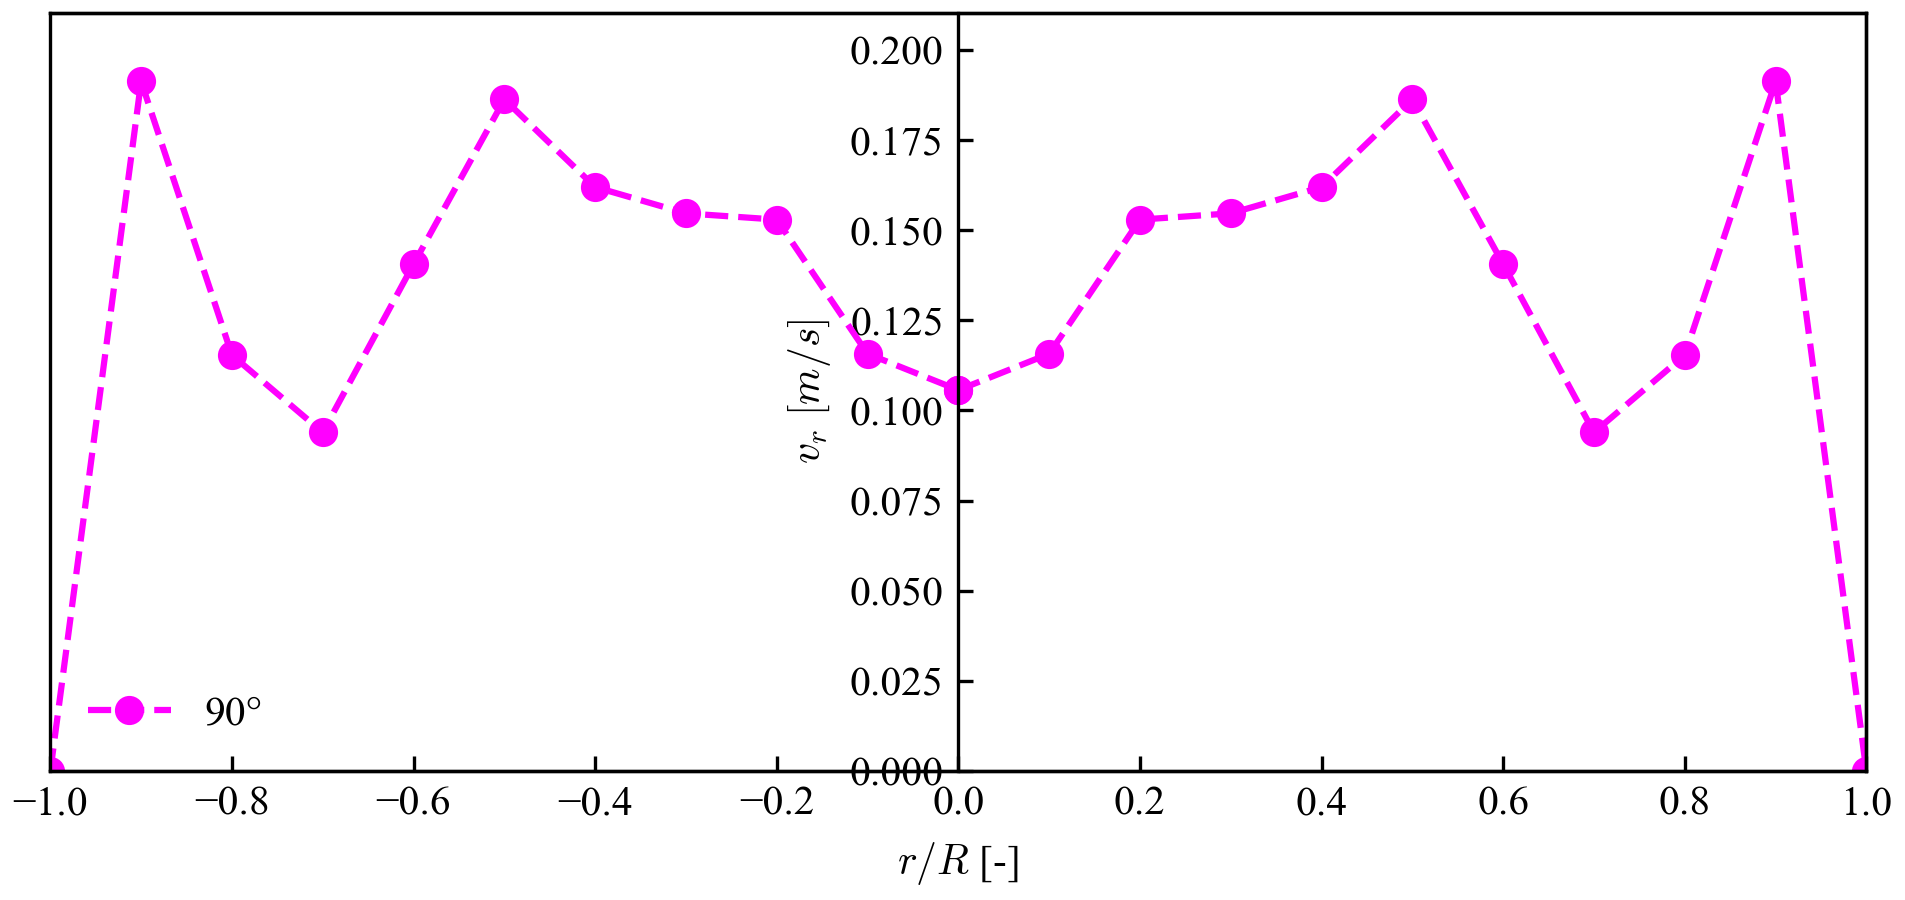

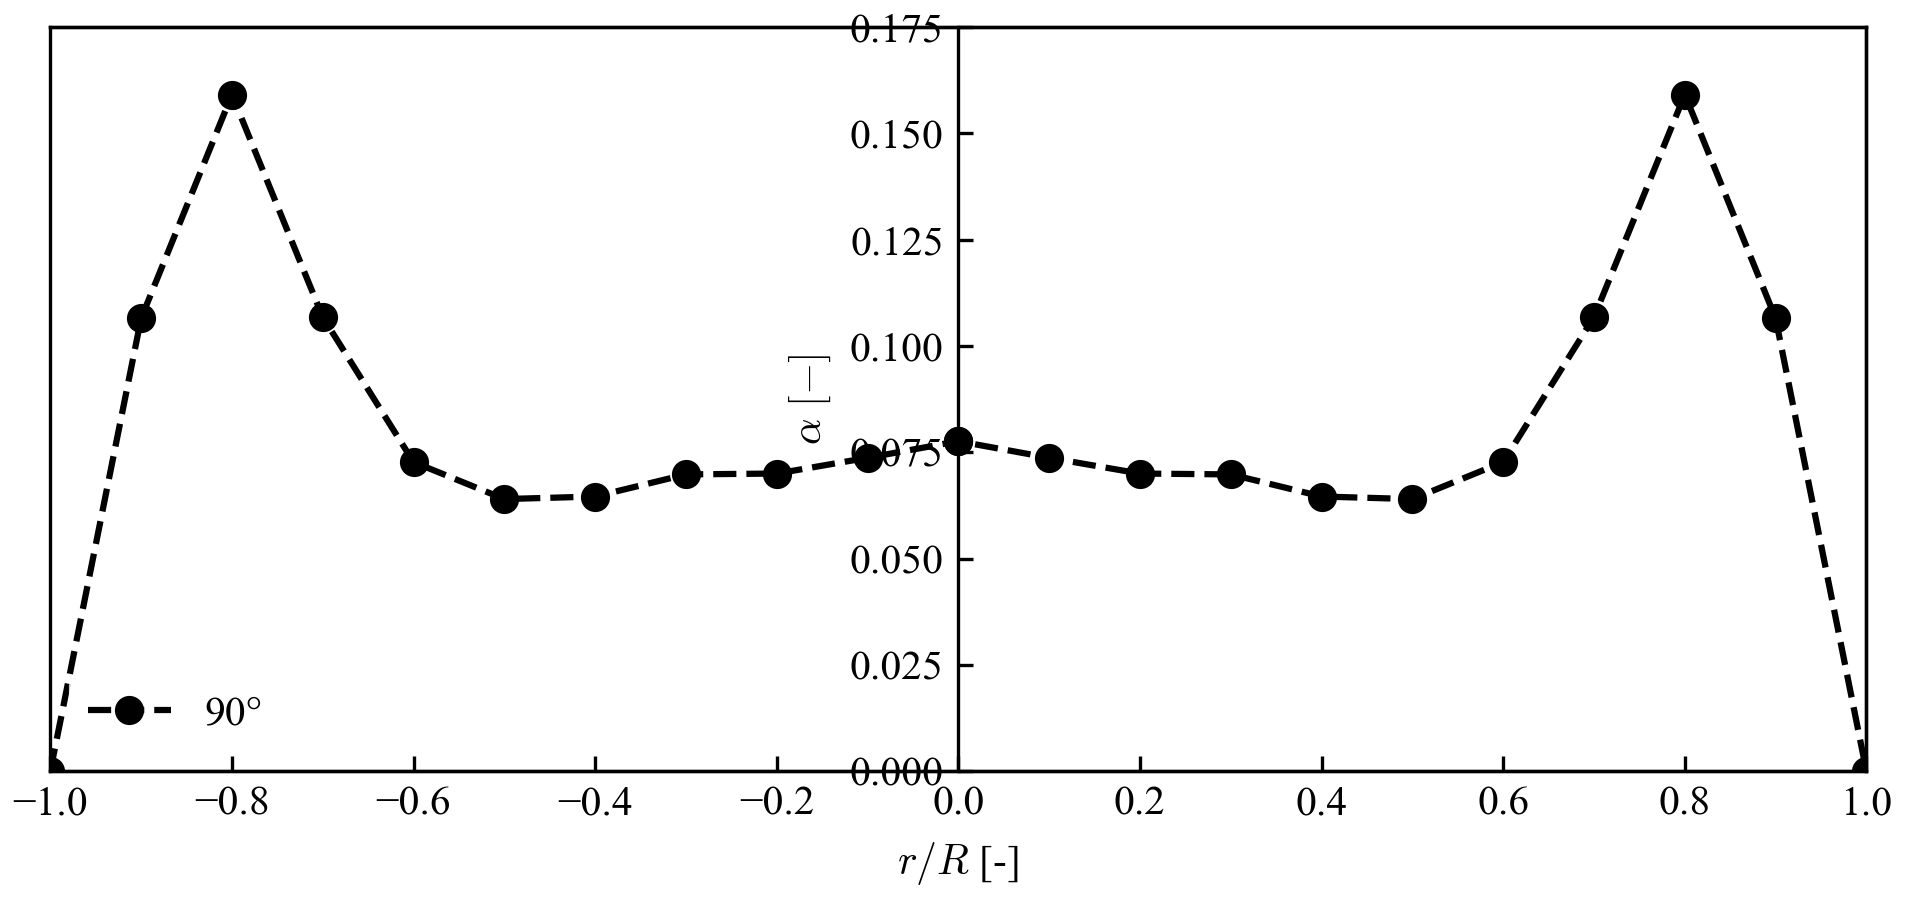

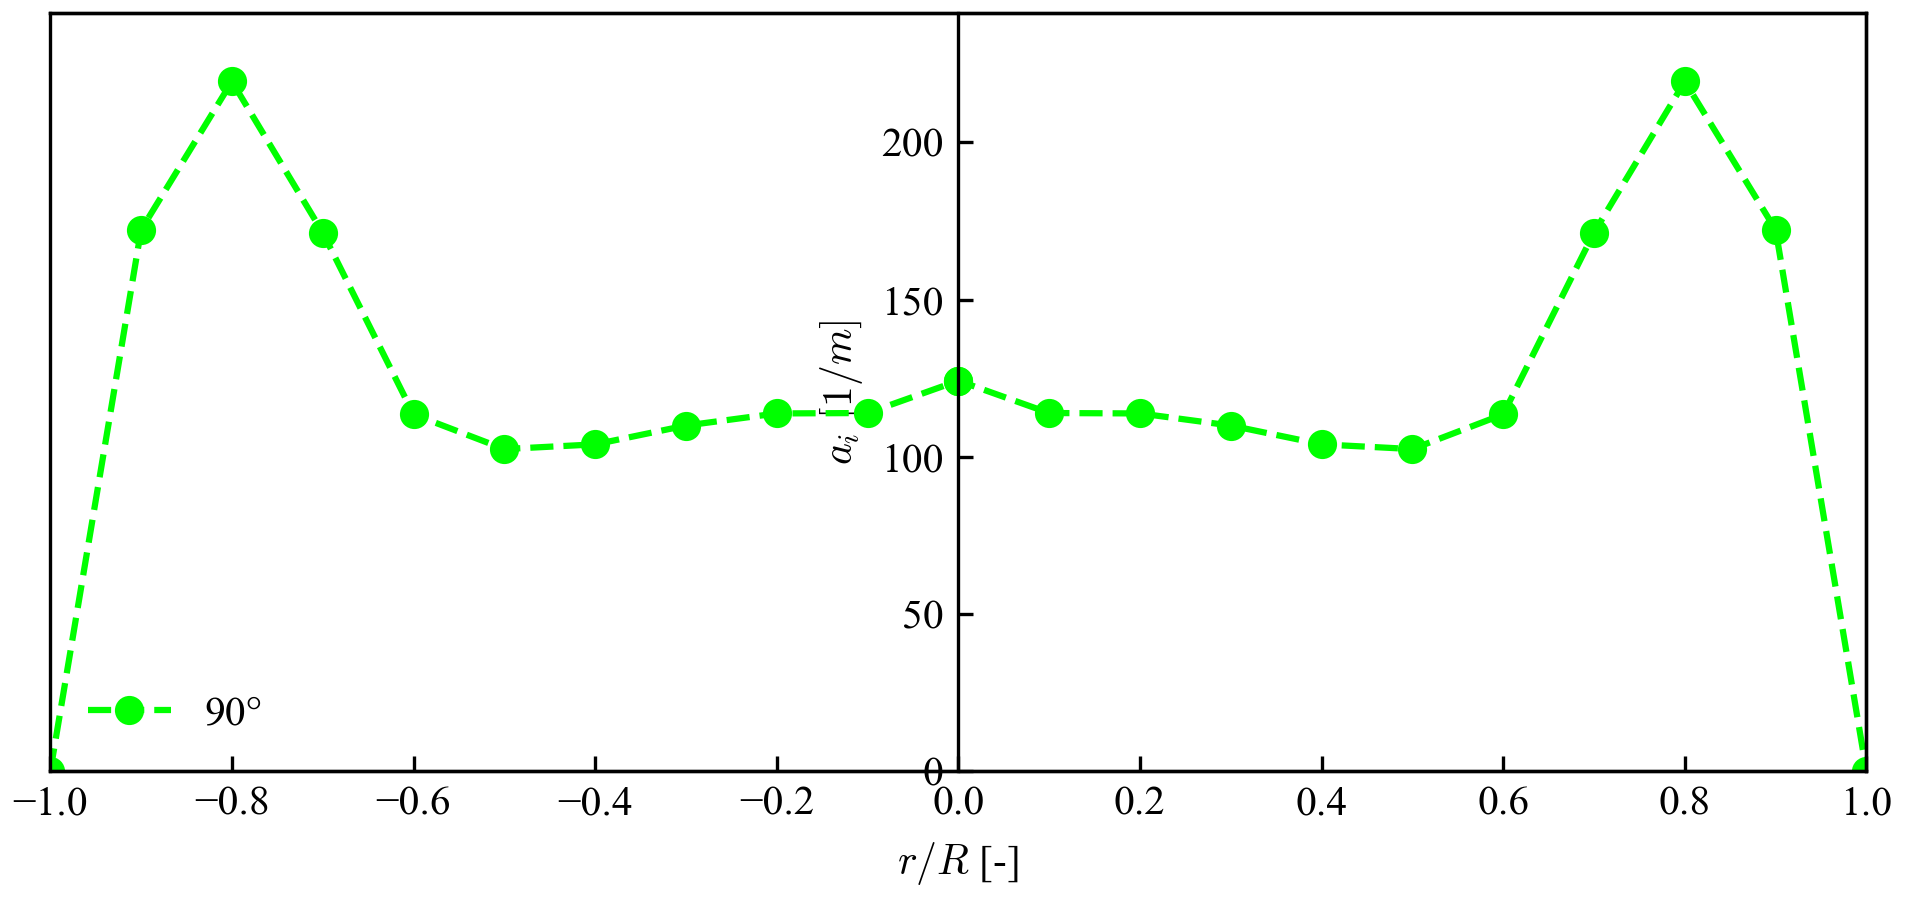

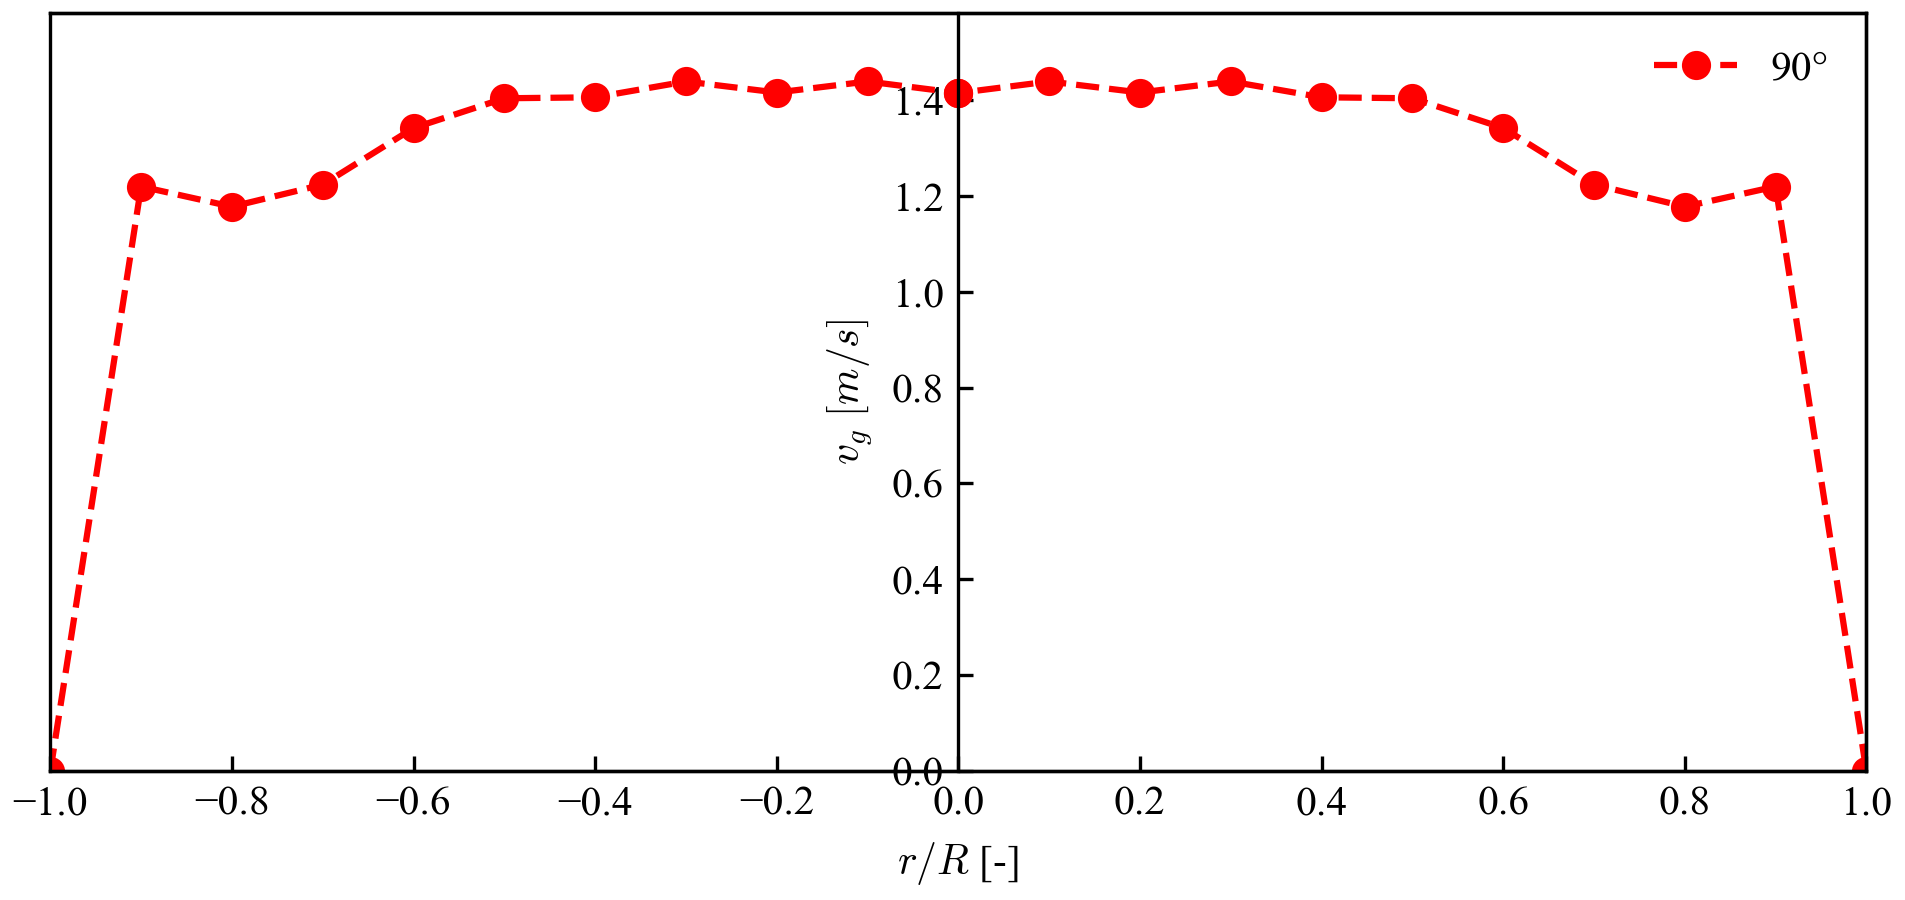

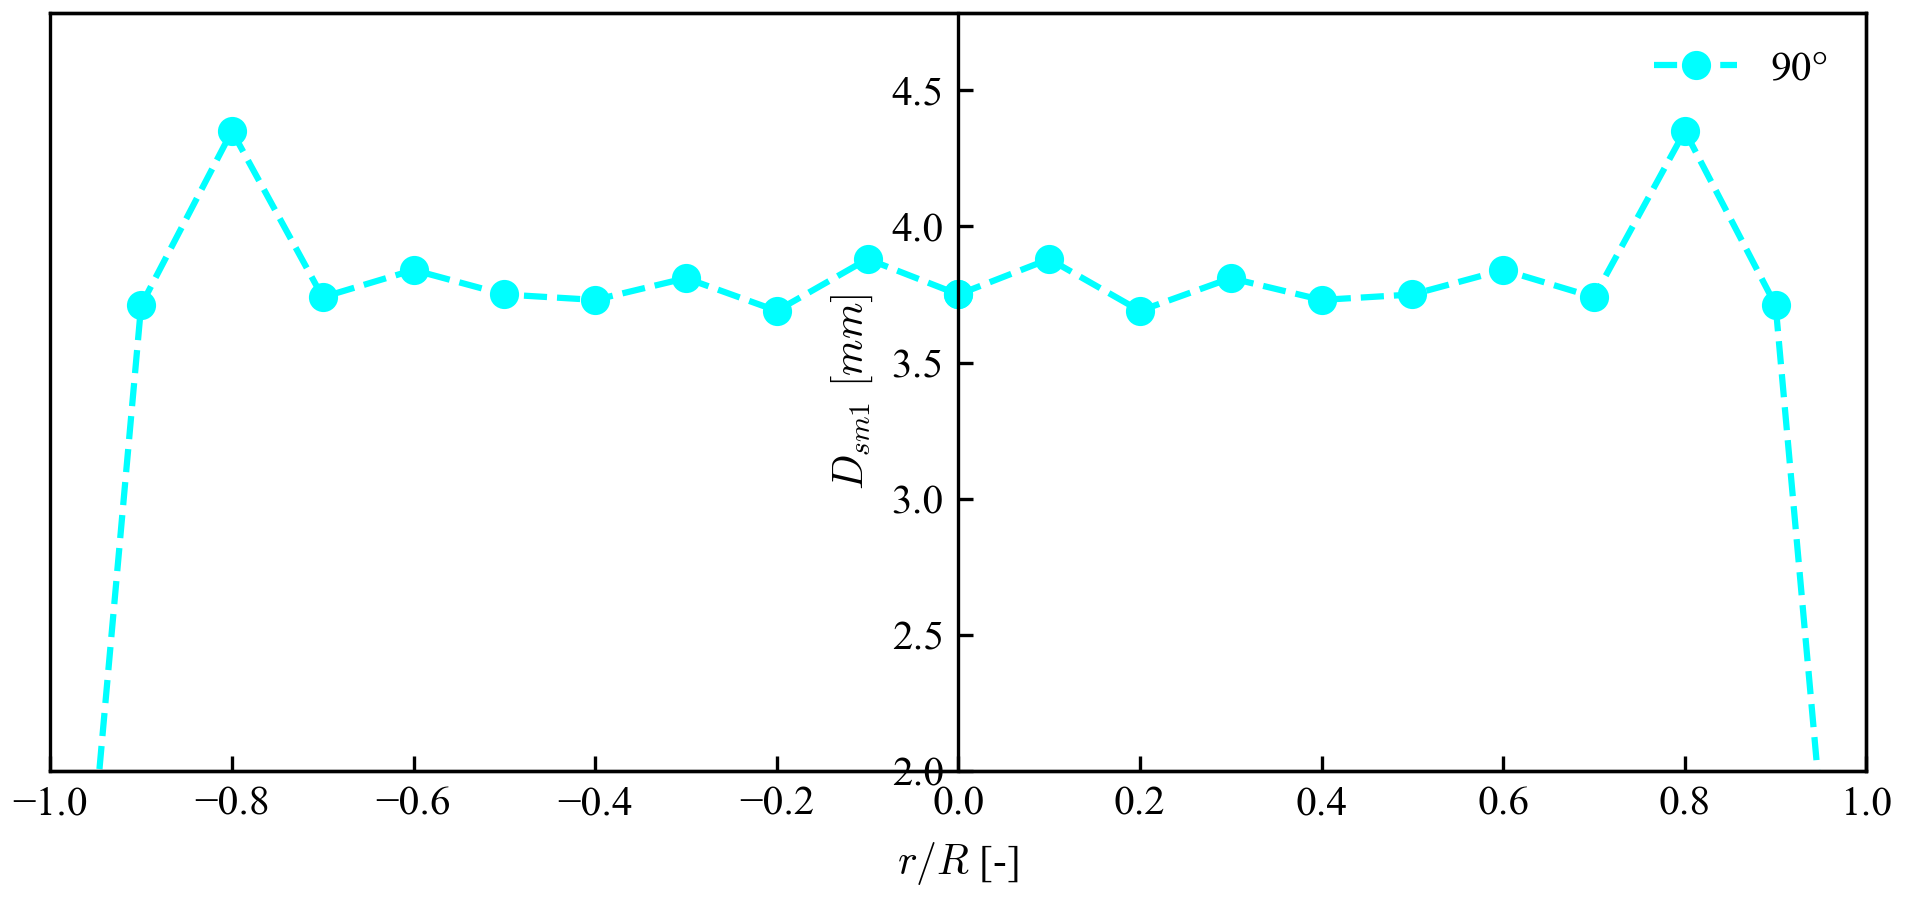

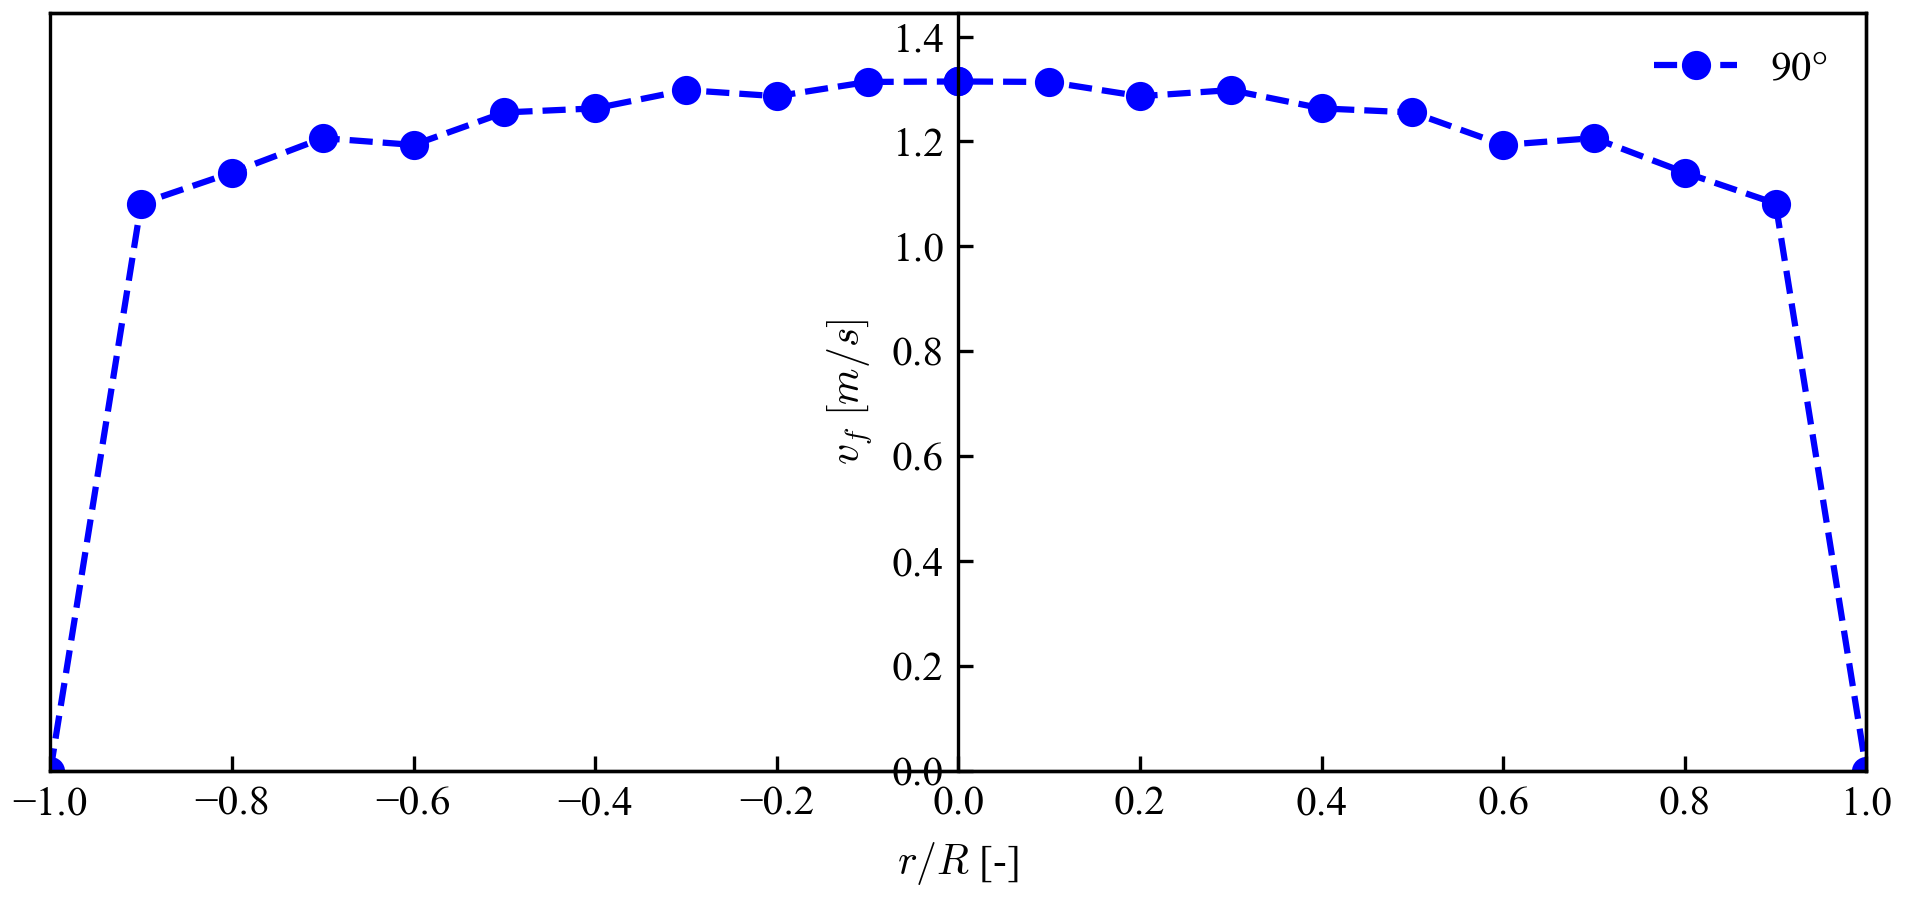

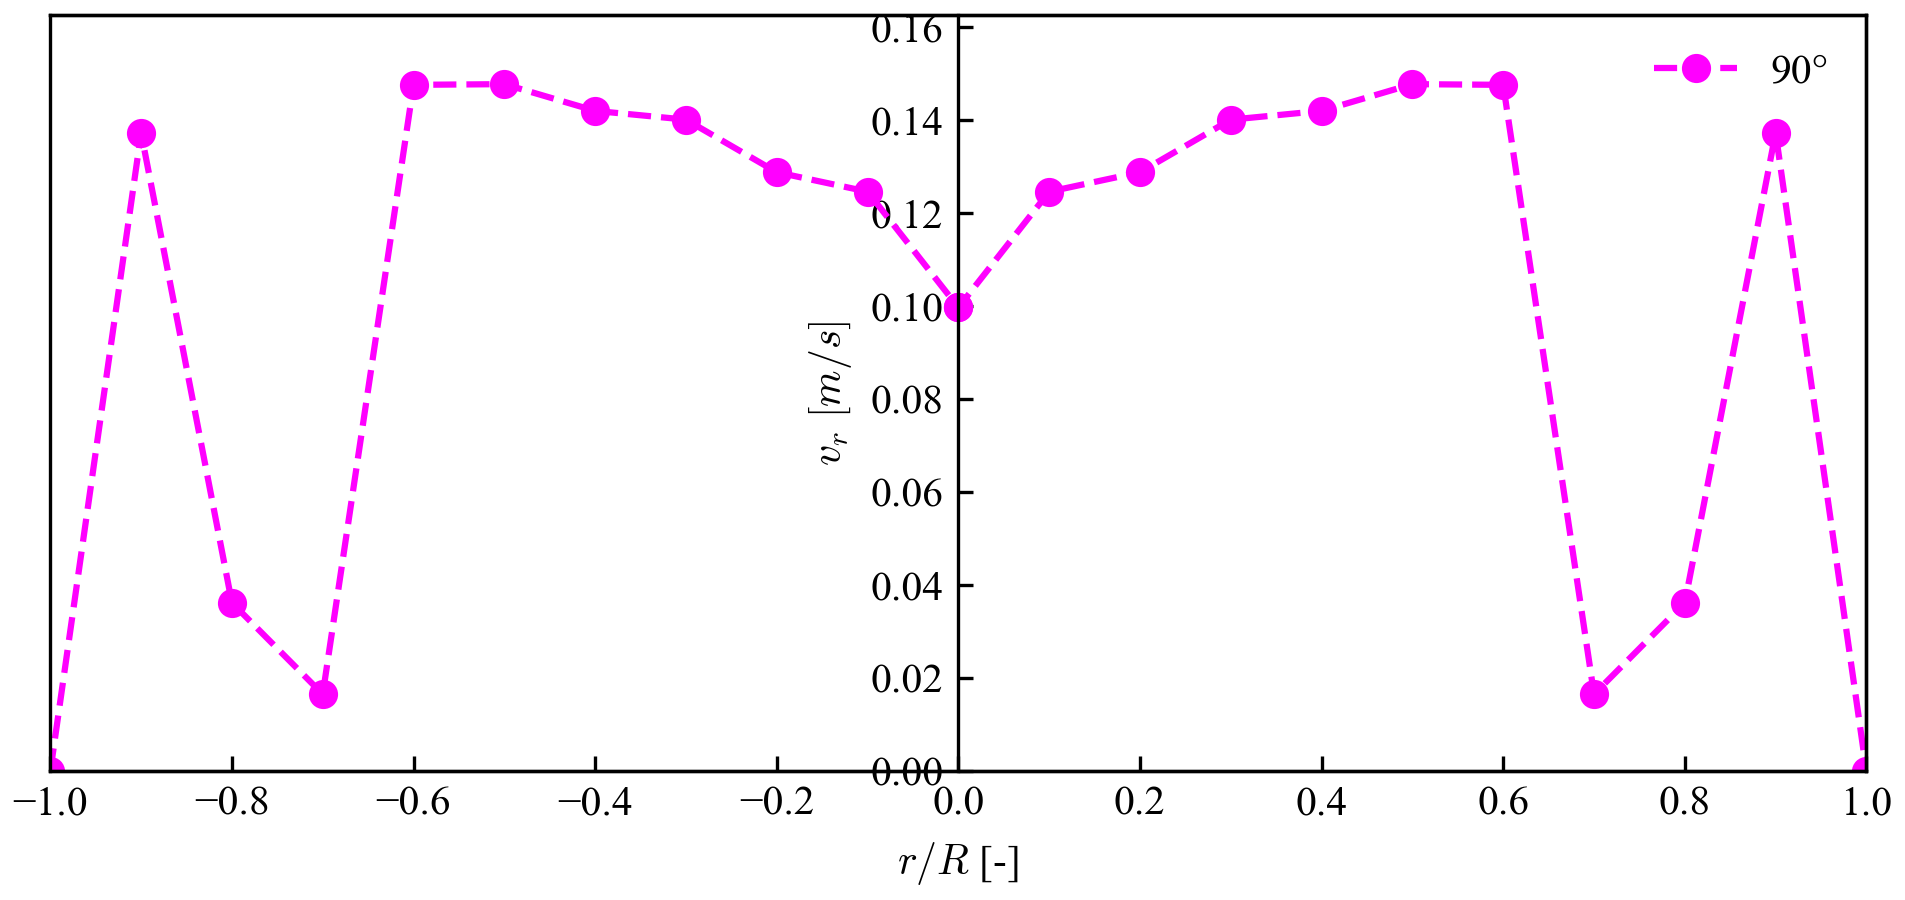

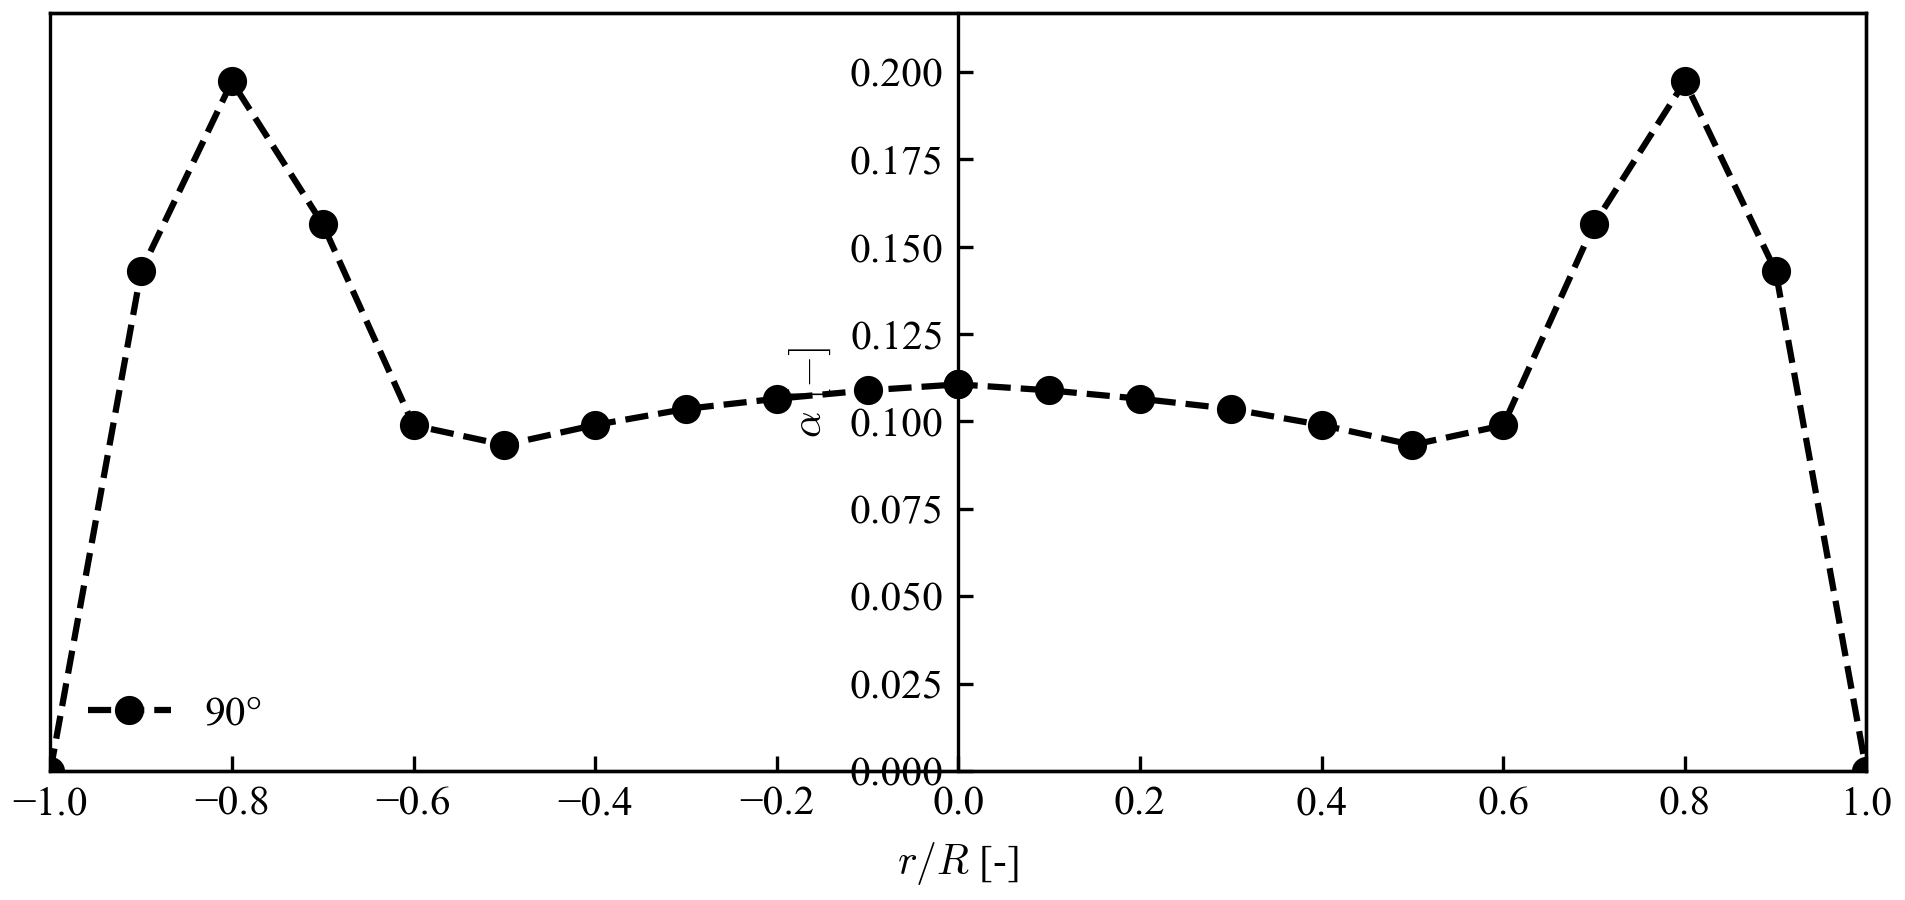

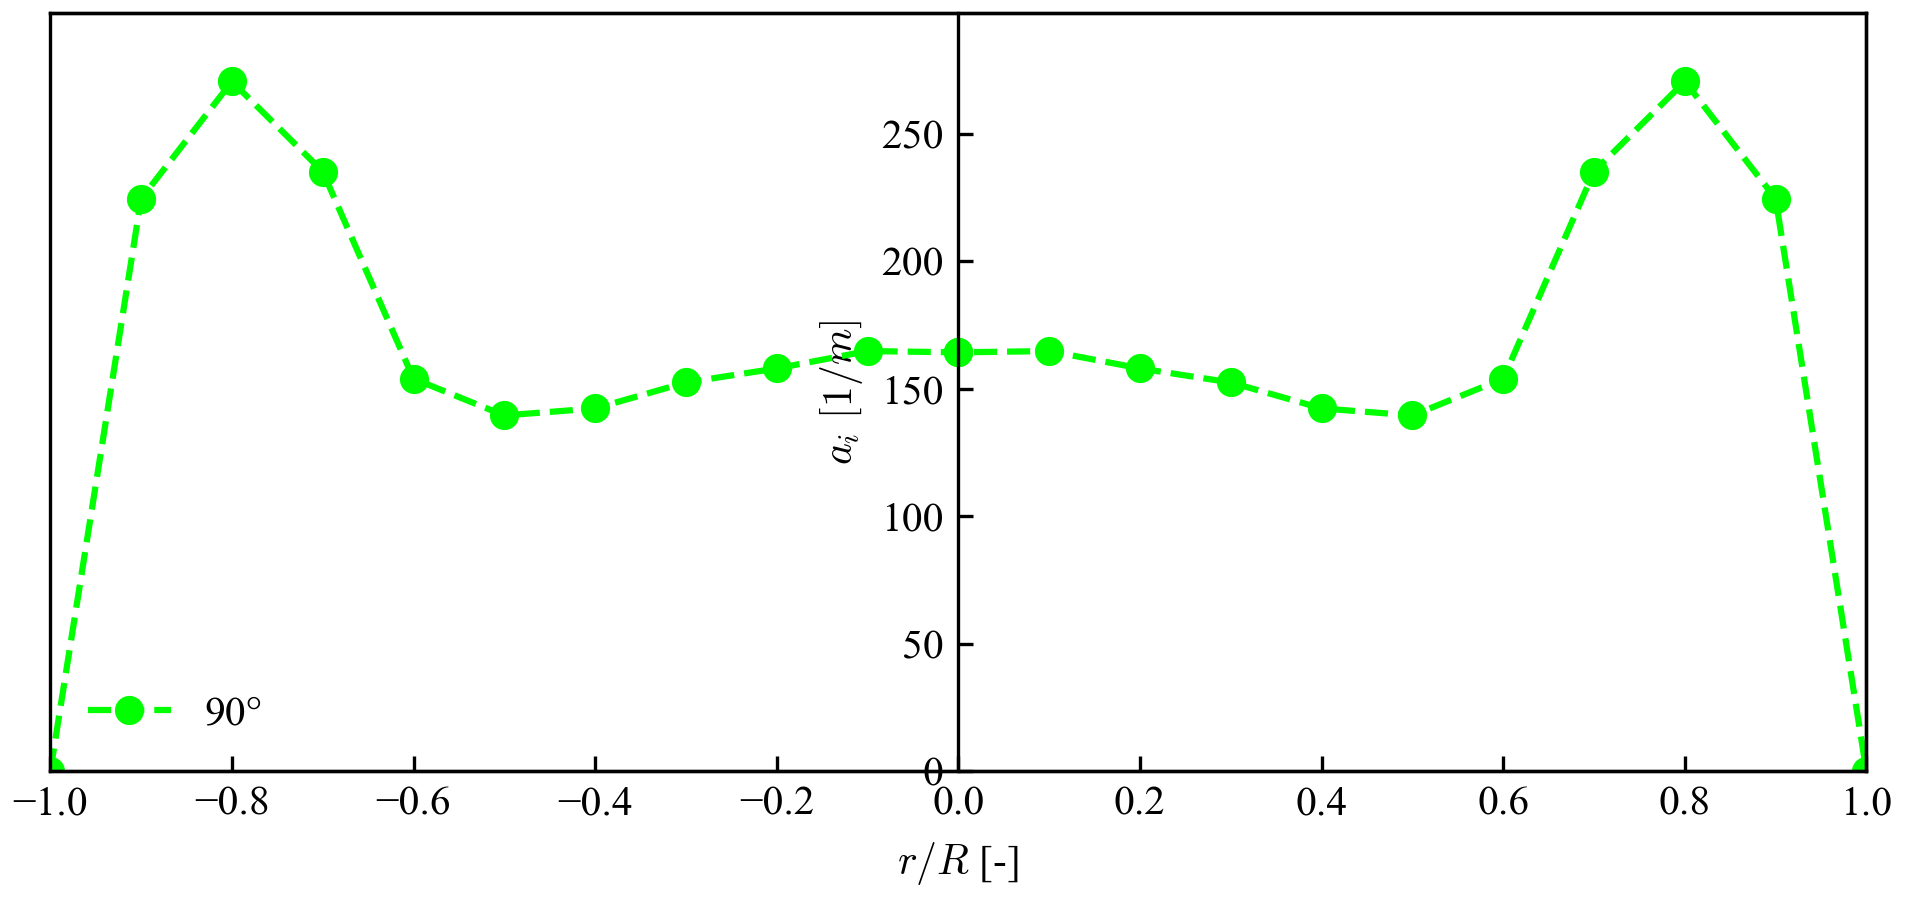

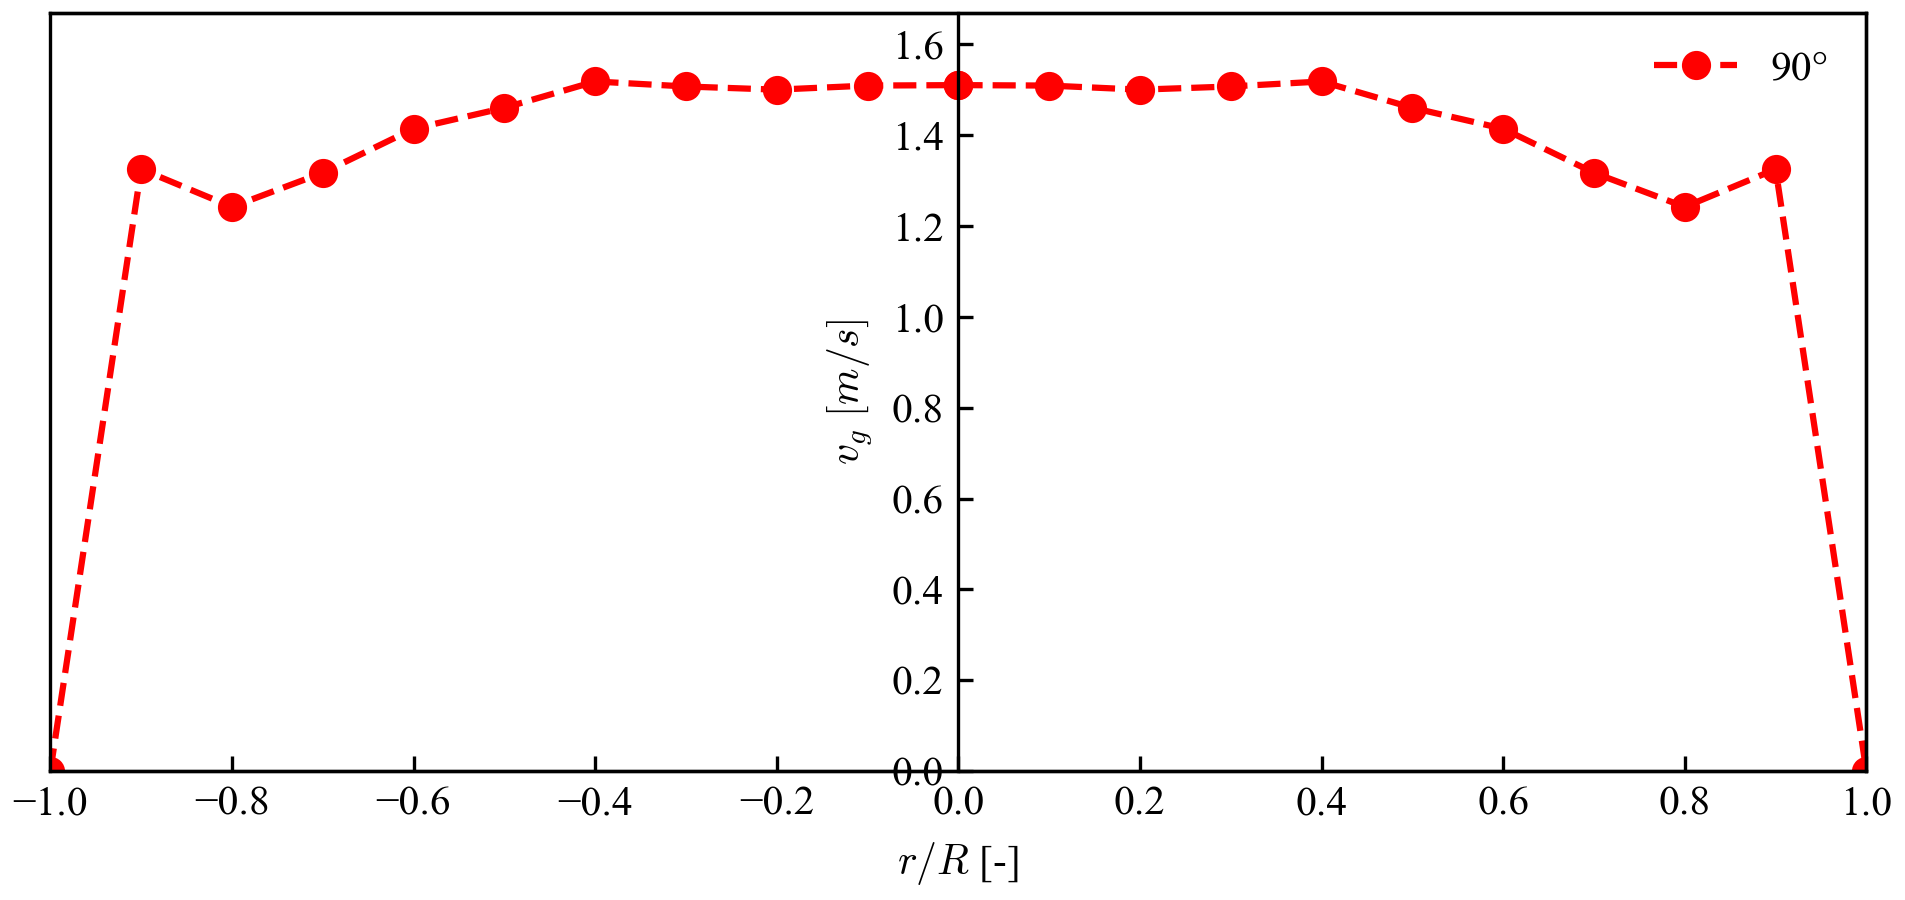

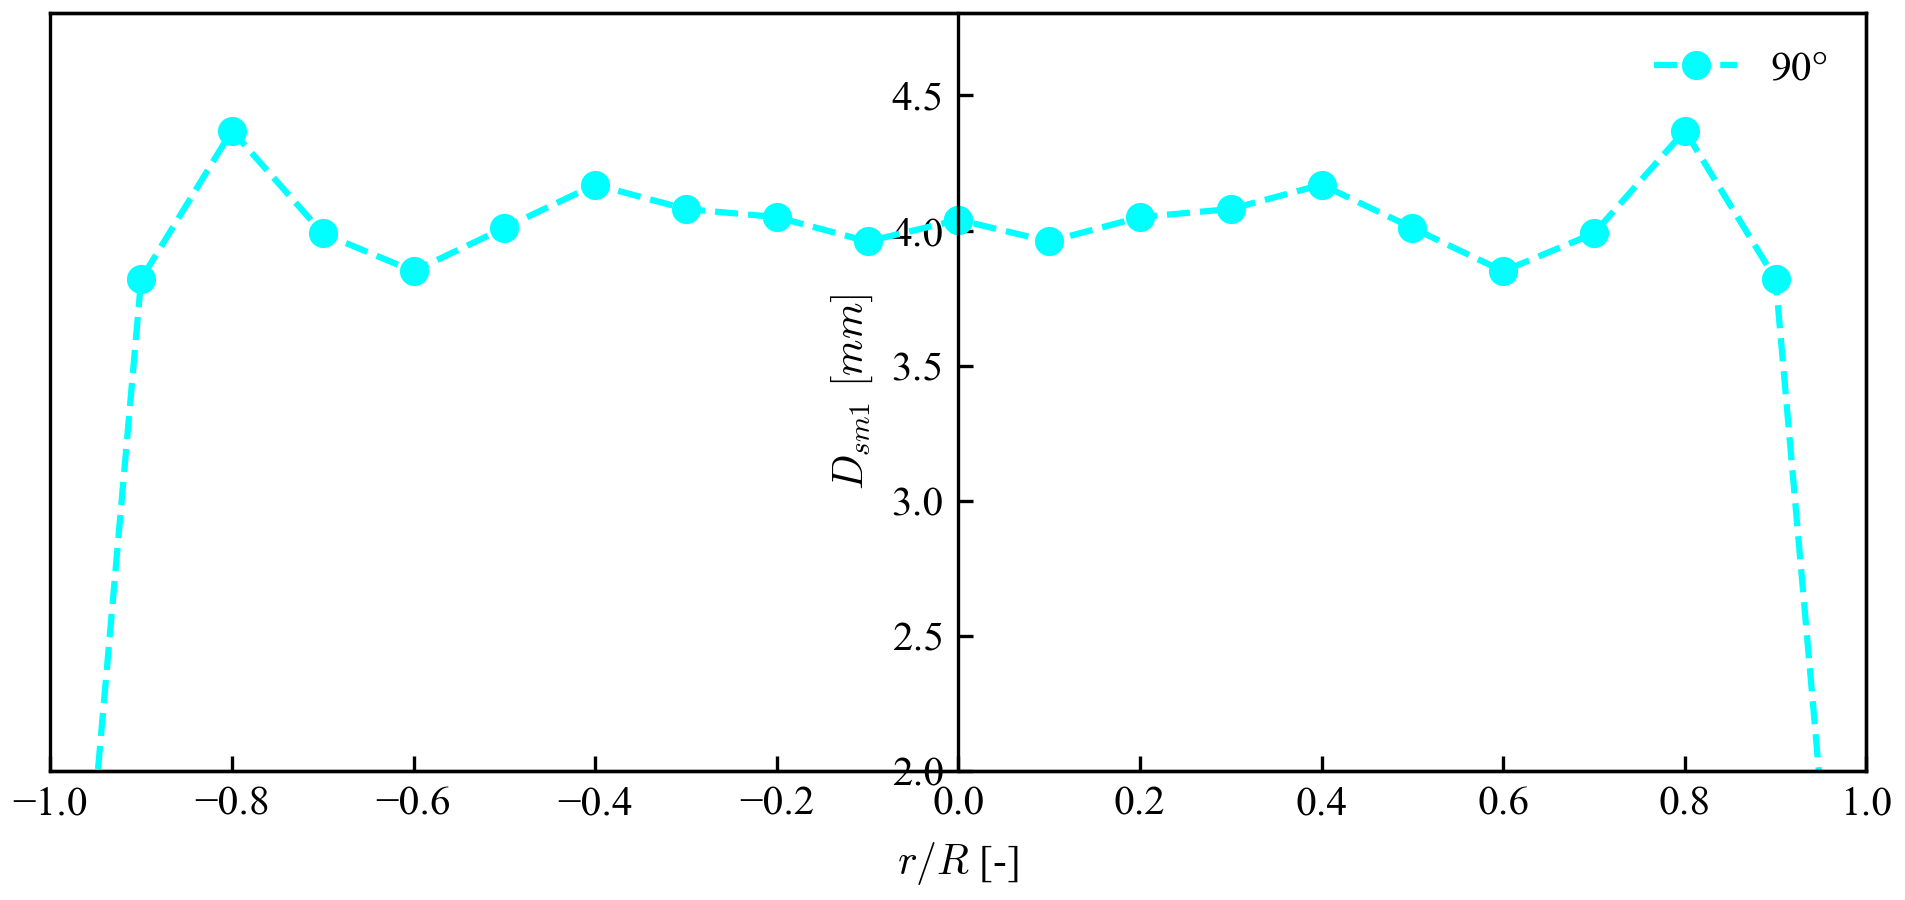

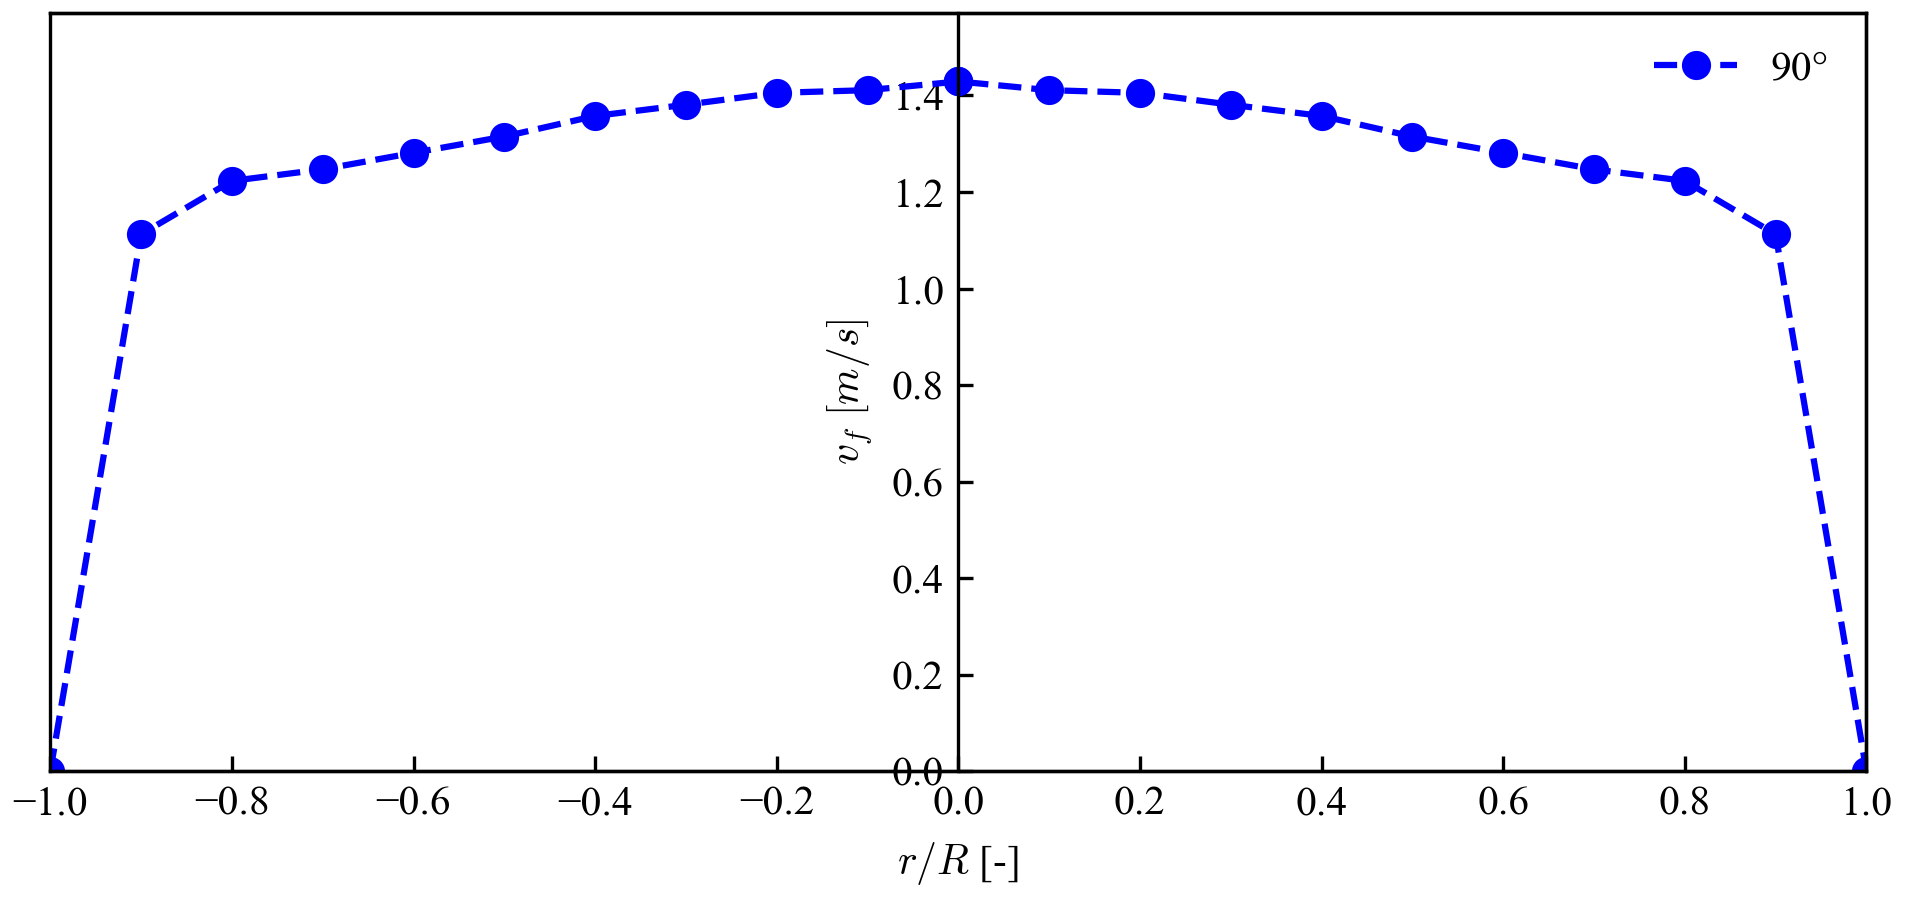

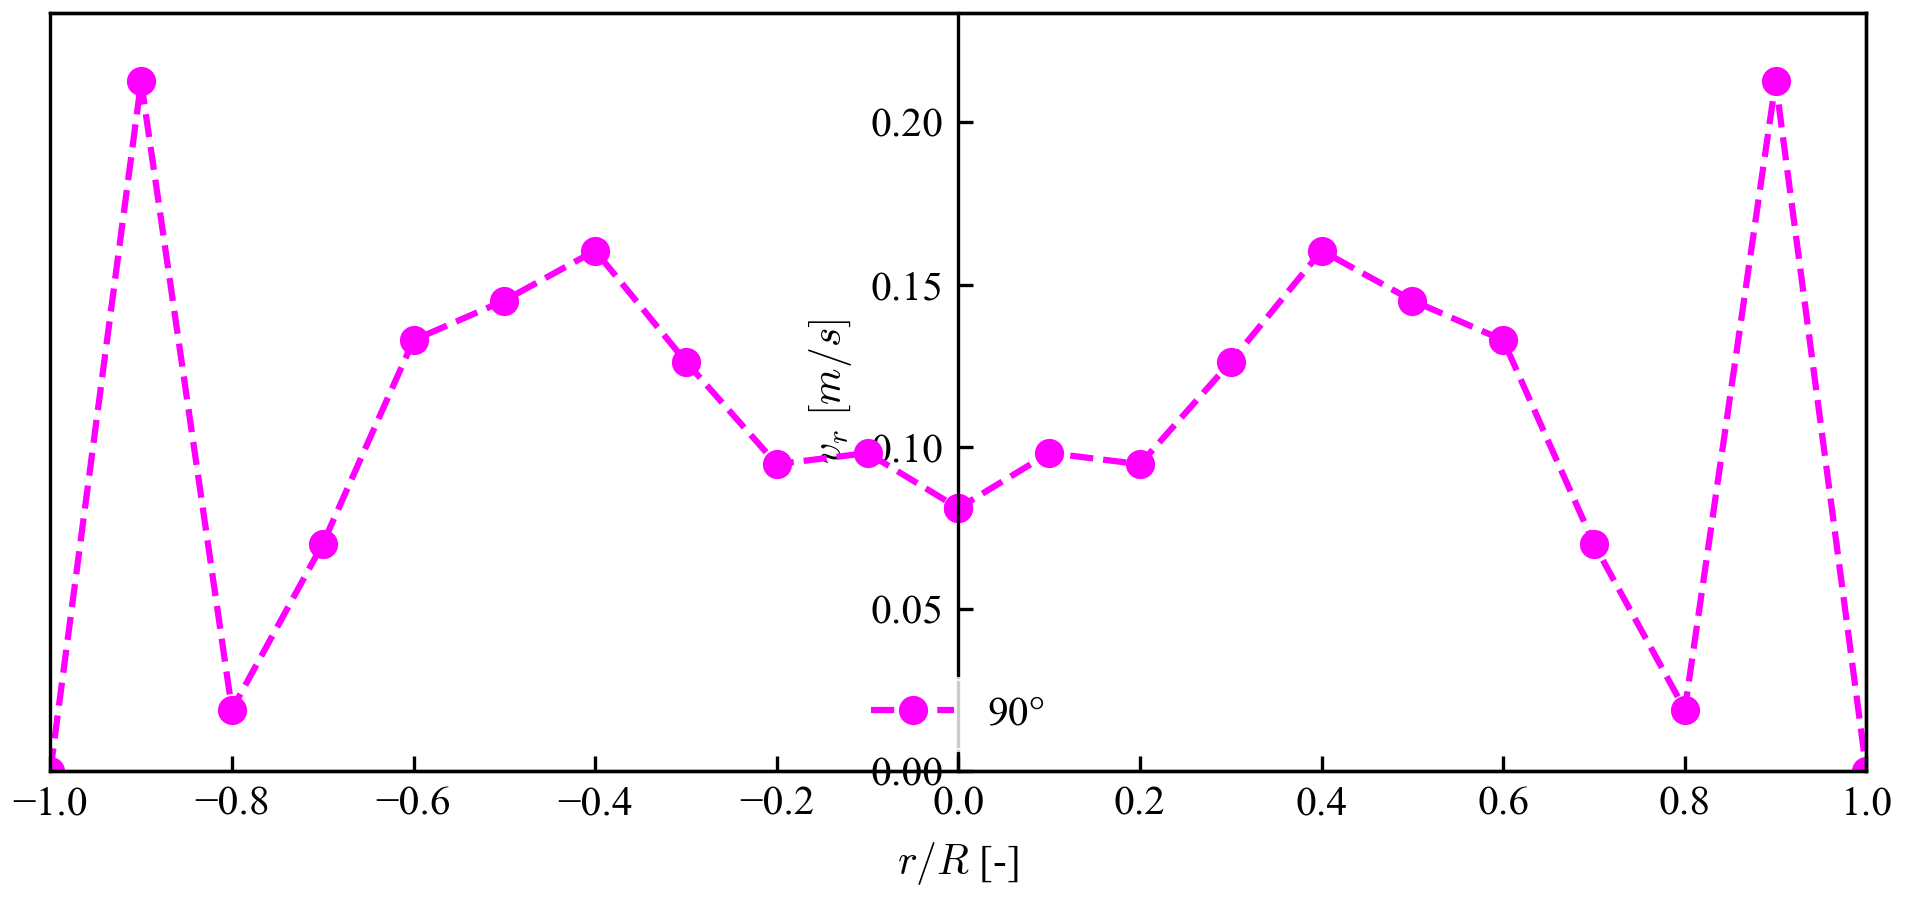

In [8]:
for cond in database:
    for param in ['alpha', 'ai', 'ug1', 'Dsm1', 'vf', 'vr']:
        # Usually the minimum of the graph is set by the minimum of the param value. But for Dsm, the diameter doesn't 
        # exactly go to zero at the wall, so when we plot it makes more sense to not go to 0
        if param == 'Dsm1':
            set_min = np.floor(cond.min('Dsm1', nonzero = True)) - 1
        else:
            set_min = cond.min(param)
        
        # This function will plot the data down the 90° line, with the r data plotted on the x axis. 
        # The colors are set by the function based on the param type. Black for void, red for vg, etc.
        # 6.35 x 3 is the best size to fit 4 graphs all on the same ppt slide
        cond.plot_profiles2(param, x_axis = 'rs', const_to_plot = [90], title = False, fig_size = (6.35, 3), show = True, cs = 'infer', set_min = set_min)